# GOAL: This notebook contains all the proceedires and code required to:
1. Load and view Microscene images.
2. Convert raw microscene data to reflectance units.
3. Buils ROIs for the plants in the microscene image(s).
4. Exctract spectra from these regions to a spectral library file.
5. Build, train, test and save classification\detection models.

# In future notebooks, we will:
6. Load spectral libraries from multiple microscene collects.
7. Build, train, test and save classification\detection models from these multi-collect libraries.
8. Apply these models to Microscene images and rigorously evaluate accuracy.
8. Apply these models to UAS hyperspectral images and rigorously evaluate accuracy.

In [ ]:
# Initial Imports
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import spectral
import pickle
import os
# module that is useful for reloading packages
import importlib
# Scripts associated with the SML4SI textbook
import hyperspectral_gta_data as hsi_data
from hsiViewer import *

# set the directory containing the image(s)
dir = 'C:/spectral_data/UPWINS/Microscene Images/Sample Microsce Image'

In [ ]:
def create_mask(im):
    # create a mask indicating the data pixels
    mask = np.zeros((im.nrows,im.ncols), dtype=bool)
    mask[np.sum(im.Arr, axis=2)>0] = 1
    return mask

def stretch_arr(arr, mask, stretch):
    # stretch iamge array based in data pixels indicated by the max
    arr_data = arr[mask>0]
    low_thresh_val = np.percentile(arr_data, stretch[0])
    high_thresh_val = np.percentile(arr_data, stretch[1])
    arr = arr - low_thresh_val
    arr[arr<0] = 0
    arr = arr/(high_thresh_val-low_thresh_val)
    arr[arr>1] = 1
    return arr

def create_RGB(im, stretch=[2,98]):       
    # create an RGB image array stretched 
    indices_rgb_bands = [np.argmin(np.abs(im.wl-670)), np.argmin(np.abs(im.wl-540)), np.argmin(np.abs(im.wl-480))]  
    imRGB =np.zeros((im.nrows,im.ncols,3))
    for i in range(3):
        imRGB[:,:,i] = stretch_arr(np.squeeze(im.Arr[:,:,indices_rgb_bands[i]]), im.mask, stretch)
    return imRGB  

def read_im(fname_hdr, fname):
    # build image structure 
    im = spectral.envi.open(fname_hdr, fname)
    im.wl = np.asarray(im.bands.centers)
    im.npix = im.nrows*im.ncols
    im.Arr = im.load() 
    im.mask = create_mask(im)
    im.rgb = create_RGB(im, stretch=[2,98])

In [91]:
# iterate though all header files in a folder
num = 100
count = 0
for (root, dirs, file) in os.walk(dir):
    for f in file:
        if f[:8]=='raw_6000':
            count+=1
            if count > num:
                break
            print(f)

raw_6000.bin
raw_6000.bin_or
raw_6000.bin_or.hdr
raw_6000.hdr
raw_6000.png
raw_6000_igm
raw_6000_igm.hdr
raw_6000_or
raw_6000_or.hdr


In [ ]:
im = read_im('raw_6000.hdr', 'raw_6000.bin')
im = read_im('raw_6000.bin_or.hdr', 'raw_6000.bin_or')
im = read_im('raw_6000.hdr', 'raw_6000.bin')
im = read_im('raw_6000.hdr', 'raw_6000.bin')

In [76]:
fname = 'C:/spectral_data/UPWINS/Morven 10112024/raw_6000_igm'
# Open the image and read into an array
im_igm = spectral.envi.open(fname+'.hdr', fname)
im_igm.wl = np.asarray(im_igm.bands.centers)
im_igm.Arr = im_igm.load() 
im_igm.mask = create_mask(im_igm)
im_igm.npix = im_igm.nrows*im_igm.ncols
# Print dimensions
print(f'Shape of im_igm.Arr = {im_igm.Arr.shape}')
print('---')

fname = 'C:/spectral_data/UPWINS/Morven 10112024/raw_6000_or'
# Open the image and read into an array
im_or = spectral.envi.open(fname+'.hdr', fname)
im_or.wl = np.asarray(im_or.bands.centers)
im_or.Arr = im_or.load()
im_or.mask = create_mask(im_or)
im_or.npix = im_or.nrows*im_igm.ncols
# Print dimensions
print(f'Shape of im_igm.Arr = {im_or.Arr.shape}')
print('---')

fname = 'C:/spectral_data/UPWINS/Morven 10112024/raw_6000.bin'
fname_hdr = 'C:/spectral_data/UPWINS/Morven 10112024/raw_6000.hdr'
# Open the image and read into an array
im = spectral.envi.open(fname_hdr, fname)
im.wl = np.asarray(im.bands.centers)
im.Arr = im.load()
im.mask = create_mask(im)
im.npix = im.nrows*im.ncols
# Print dimensions
print(f'Shape of im_igm.Arr = {im.Arr.shape}')

Shape of im_igm.Arr = (1000, 1020, 4)
---
Shape of im_igm.Arr = (1344, 1300, 343)
---
Shape of im_igm.Arr = (1000, 1020, 343)


In [72]:
# View the Orthorectified Image
#importlib.reload(hsv)
#hsv.viewer(im_or, stretch=[2,98], rotate=True)

# View the raw image 
importlib.reload(hvl)
layers = {'ima0': im_igm.Arr[:,:,0], 
          '1': im_igm.Arr[:,:,1], 
          '2': im_igm.Arr[:,:,2],
          '3': im_igm.Arr[:,:,3] }
hvl.viewer(im, stretch=[2,98], layers=layers, rotate=True)

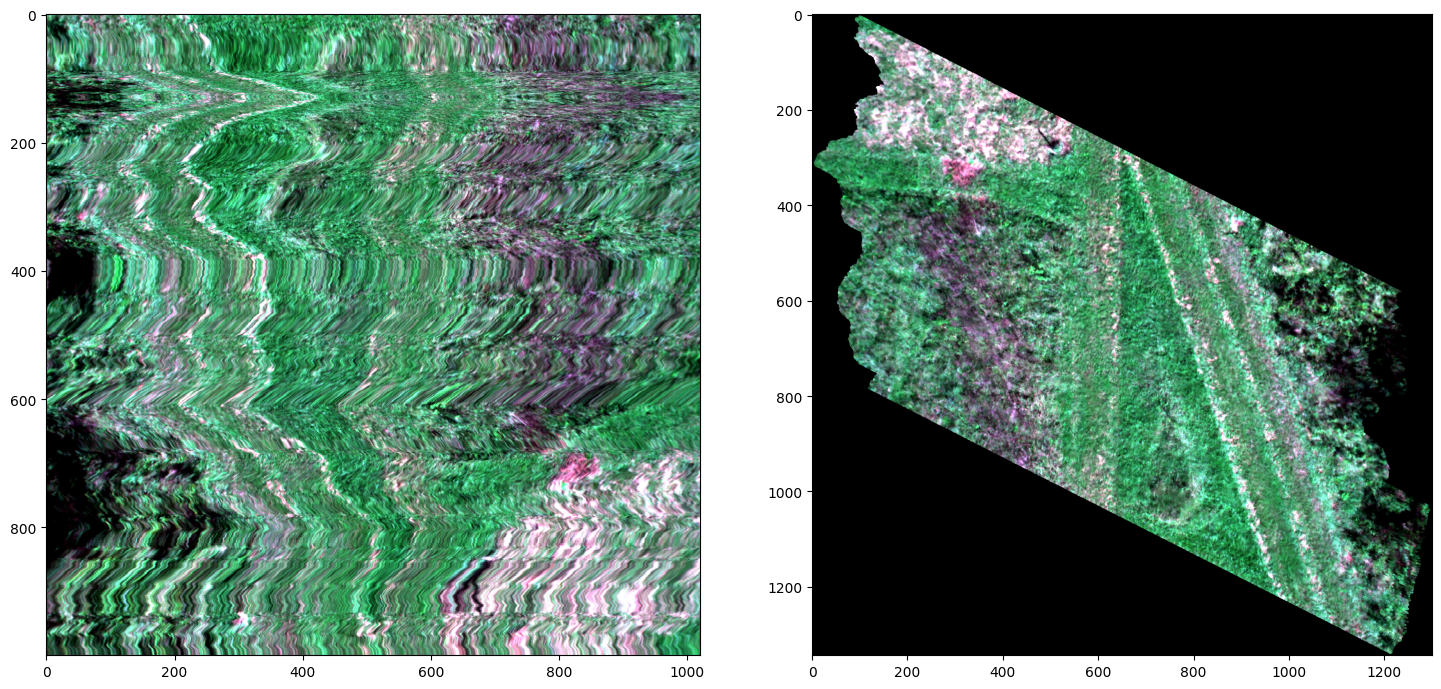

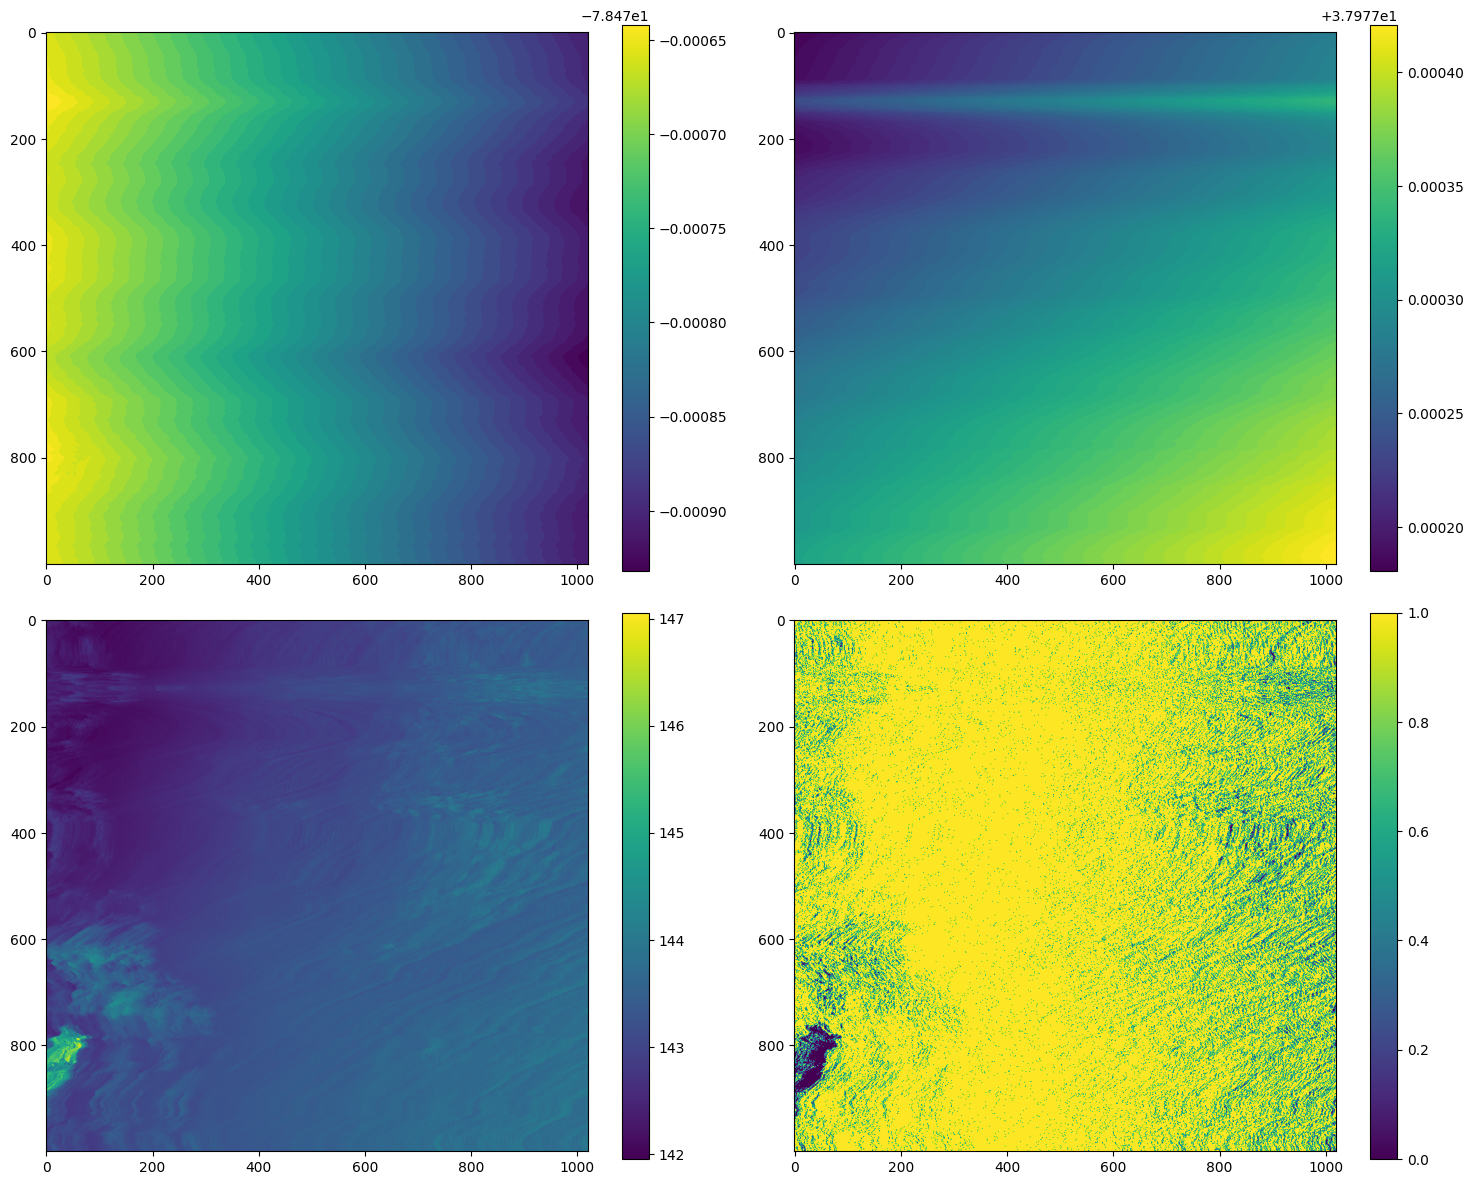

In [70]:
plt.figure(figsize=(15,7))
for i,image in enumerate([im,im_or]):
    plt.subplot(1, 2, i+1)  
    plt.imshow(create_RGB(image))
plt.tight_layout()

plt.figure(figsize=(15,12))
for i in range(4):
    plt.subplot(2, 2, i+1)  
    plt.imshow(im_igm.Arr[:,:,i])
    plt.colorbar()
plt.tight_layout()